<a href="https://colab.research.google.com/github/Mohammed-Aasim-9988/Assignments_DS/blob/main/simple_linear_regression_2_salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# impoort libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Salary_Data (1).csv to Salary_Data (1).csv


In [3]:
dataset = pd.read_csv("Salary_Data (1).csv")

In [4]:
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


#EDA and Data Visualization

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


<ipython-input-6-c16c18e1f77c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['YearsExperience'])


<Axes: xlabel='YearsExperience', ylabel='Density'>

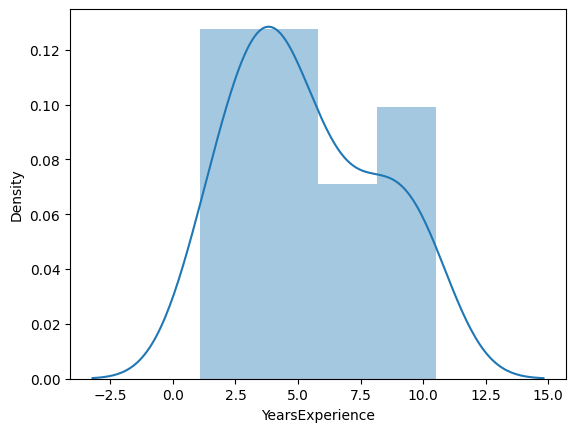

In [6]:
sns.distplot(dataset['YearsExperience'])

<ipython-input-7-9fd6134c9331>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Salary'])


<Axes: xlabel='Salary', ylabel='Density'>

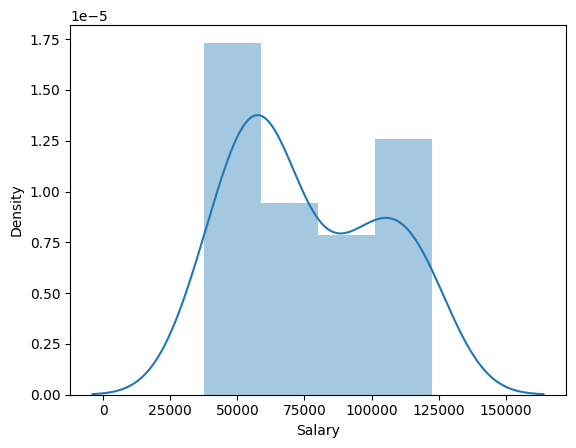

In [7]:
sns.distplot(dataset['Salary'])

In [11]:
 #Standardization(Z-score normalization)
data_standardized = (dataset - dataset.mean()) / dataset.std()
data_standardized

,YearsExperience,Salary
0,-1.484672,-1.337252
1,-1.414197,-1.086946
2,-1.343722,-1.396053
3,-1.167535,-1.184705
4,-1.097060,-1.317262
5,-0.850398,-0.706234
6,-0.815160,-0.578272
7,-0.744685,-0.786374
8,-0.744685,-0.421603
9,-0.568498,-0.686281


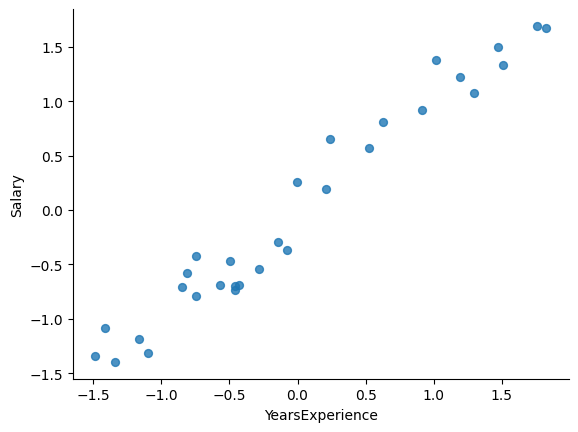

In [14]:
from matplotlib import pyplot as plt
data_standardized.plot(kind='scatter', x='YearsExperience', y='Salary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [16]:
# Min-Max Scaling
data_min_max_scaled = (dataset - dataset.min()) / (dataset.max() - dataset.min())
data_min_max_scaled

,YearsExperience,Salary
0,0.000000,0.019041
1,0.021277,0.100094
2,0.042553,0.000000
3,0.095745,0.068438
4,0.117021,0.025514
5,0.191489,0.223376
6,0.202128,0.264812
7,0.223404,0.197425
8,0.223404,0.315545
9,0.276596,0.229837


<Axes: xlabel='YearsExperience', ylabel='Salary'>

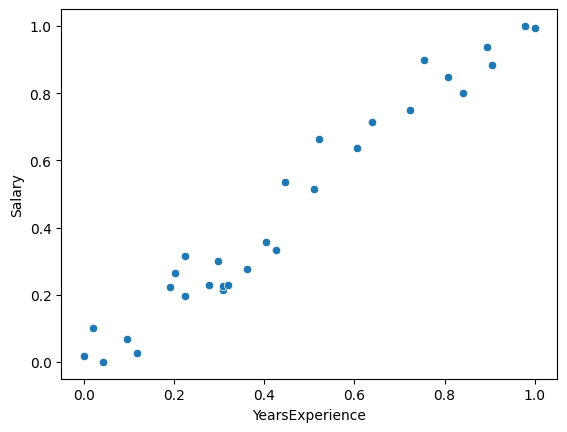

In [17]:

sns.scatterplot(x="YearsExperience", y="Salary", data=data_min_max_scaled)

#Correlation Analysis

In [12]:
dataset.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [18]:
data_standardized.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [19]:
data_min_max_scaled.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: xlabel='YearsExperience', ylabel='Salary'>

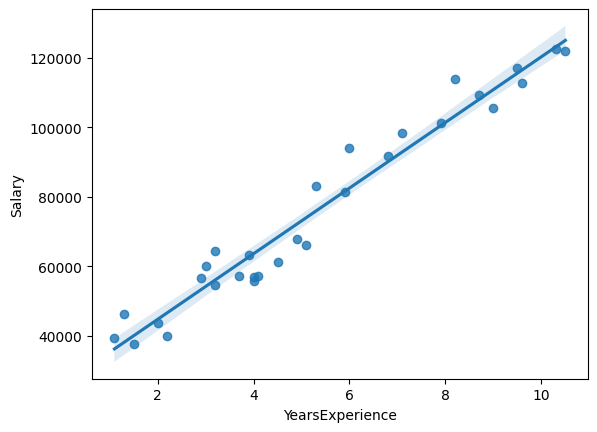

In [13]:
sns.regplot(x=dataset['YearsExperience'],y=dataset['Salary'])

#Model Building

In [30]:
model=smf.ols("Salary~YearsExperience",data=data_min_max_scaled).fit()


In [31]:
model1=smf.ols("Salary~YearsExperience",data=data_standardized).fit()

#Model Testing

In [22]:
# Finding Cefficient Parameters
model.params

Intercept         -0.018236
YearsExperience    1.049252
dtype: float64

In [23]:
# Finding Pvalues and tvalues
model.tvalues, model.pvalues

(Intercept          -0.806598
 YearsExperience    24.950094
 dtype: float64,
 Intercept          4.266967e-01
 YearsExperience    1.143068e-20
 dtype: float64)

In [32]:
model1.tvalues, model1.pvalues

(Intercept         -1.440018e-15
 YearsExperience    2.495009e+01
 dtype: float64,
 Intercept          1.000000e+00
 YearsExperience    1.143068e-20
 dtype: float64)

In [24]:
# Finding Rsquared values
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [33]:
model1.rsquared, model1.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

#Model Predictions

In [25]:
# Manual prediction for say 3 Years Experience
Salary = (25792.200199) + (9449.962321)*(3)
Salary

54142.087162

In [26]:
# Automatic Prediction for say 3 & 5 Years Experience
new_data=pd.Series([3,5])
new_data

0    3
1    5
dtype: int64

In [27]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,3
1,5


In [28]:
model.predict(data_pred)

0    3.129519
1    5.228023
dtype: float64